CODE IMPLEMENTATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. Chargement des données

In [2]:
# Lire le fichier CSV
df = pd.read_csv('../data/kidney_disease.csv')

# Afficher les 5 premières lignes
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


3. Exploration initiale

In [3]:
# Informations de base sur le dataframe
print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Statistiques descriptives
df.describe(include='all')

Shape: (400, 26)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc         

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Nettoyage des données (à adapter selon le dataset)

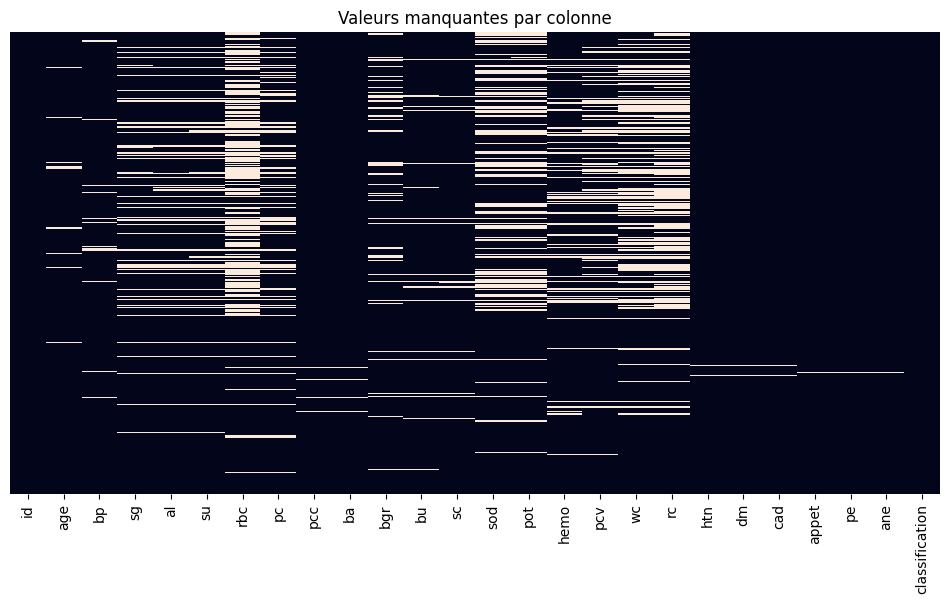

In [4]:
# Vérification des valeurs manquantes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Valeurs manquantes par colonne')
plt.show()

# Gestion des valeurs manquantes (exemple)
df.fillna(df.mode().iloc[0], inplace=True)  # Remplissage par le mode

# Conversion des variables catégorielles
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['classification'] = le.fit_transform(df['classification'])

5. Analyse univariée

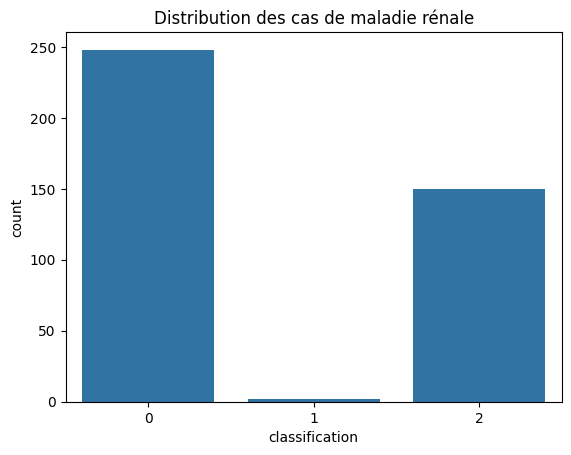

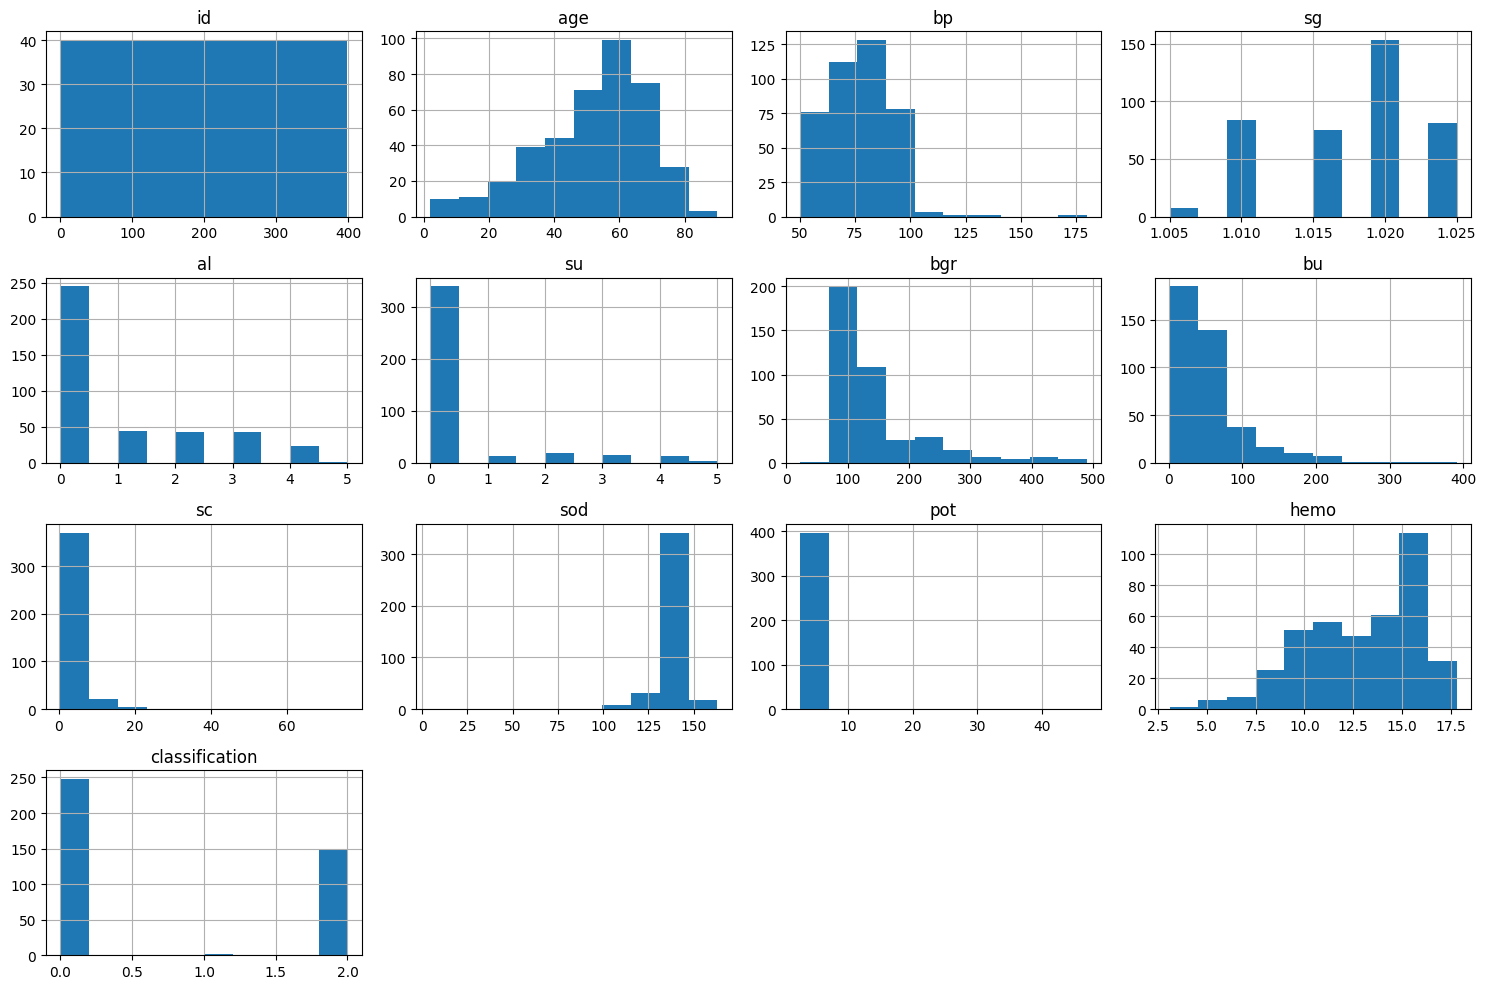

In [5]:
# Distribution de la variable cible
sns.countplot(x='classification', data=df)
plt.title('Distribution des cas de maladie rénale')
plt.show()

# Histogrammes pour les variables numériques
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

6. Analyse multivariée

on enchaine comme ca...